## CUSTOMER CHURN ANALYSIS


In [342]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# Load The Data Set

In [343]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Get Categorical Columns

In [344]:
cat_col = [col for col in df.columns if df[col].dtype=='object']
cat_col


['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

# Dataset information

In [345]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [346]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [347]:
# Change TotalCharges to numeric datatype
df['TotalCharges']= pd.to_numeric(df['TotalCharges'] ,errors ='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [348]:
# Display null value rows

df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [349]:
# drop rows where tenure is 0
df = df.drop(labels=df[df['tenure']==0].index, axis=0)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [350]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# Exploratory Data Analysis


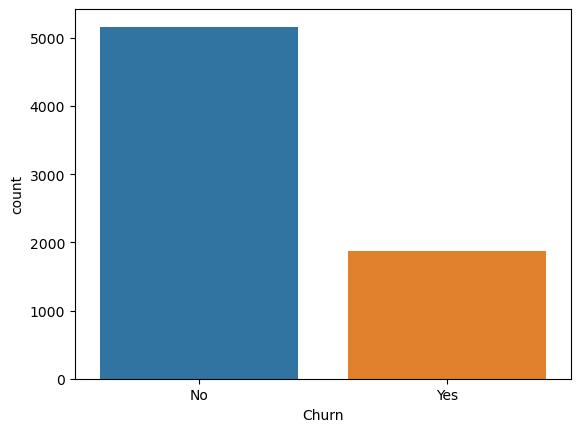

In [351]:
sns.countplot(x='Churn',data=df);


dataset is slightly imbalanced ,suggest to use sampling techniques to balance the dataset


<Axes: xlabel='Churn', ylabel='count'>

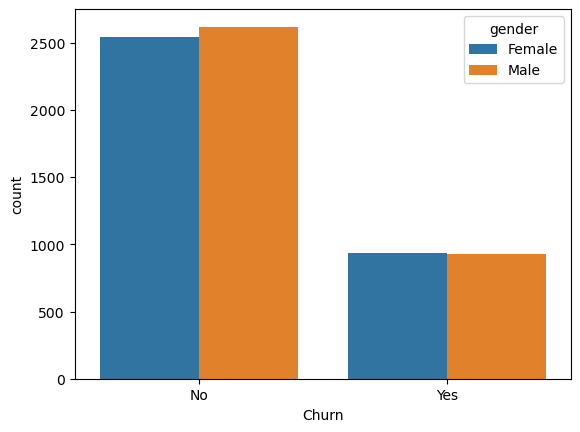

In [352]:
sns.countplot(x='Churn',hue='gender',data=df)

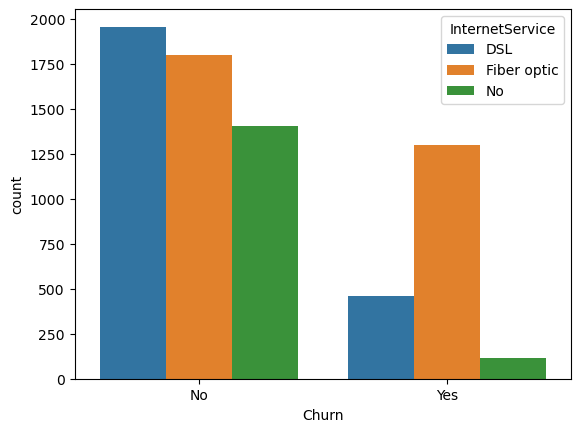

In [353]:
df['InternetService'] = df['InternetService'].astype(str)

sns.countplot(x='Churn', hue='InternetService', data=df)
plt.show()


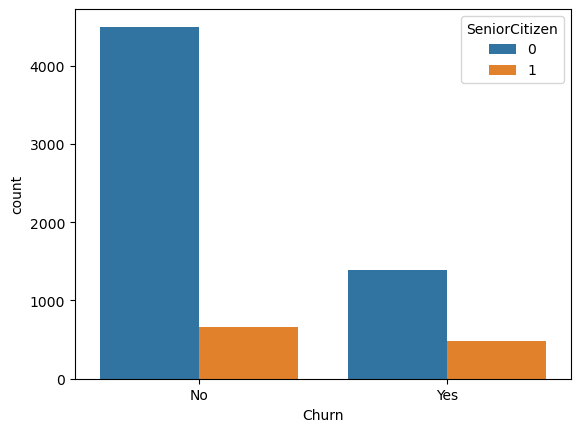

In [354]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

sns.countplot(x='Churn', hue='SeniorCitizen', data=df)
plt.show()


In [355]:
print(df['SeniorCitizen'].dtype)

object


senior citizen more likely to churn

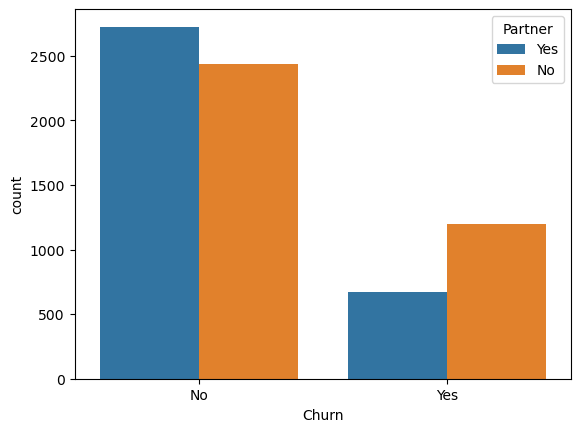

In [356]:
sns.countplot(x='Churn',hue='Partner', data=df);


people who doesnt have any partner or single person  more like to get churn


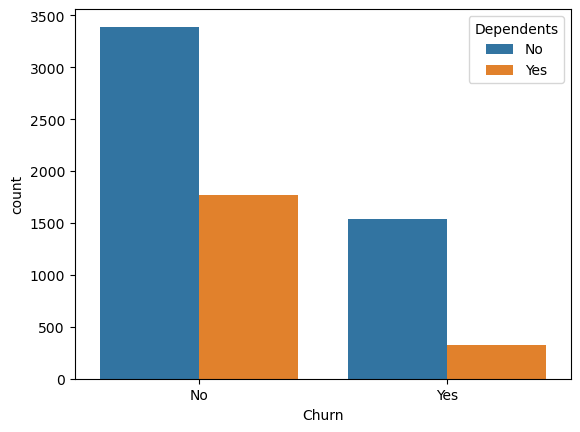

In [357]:
sns.countplot(x='Churn',hue='Dependents', data=df);

people who doesnt have any dependents or single person  more likly to get churn
if the customer has a family, all of them prefer to use same sevies and retension is high 

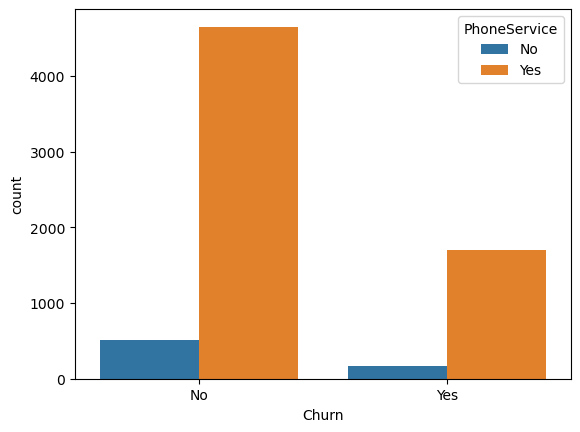

In [358]:
sns.countplot(x='Churn', hue='PhoneService', data=df);

people who have phoneservices more like to churn

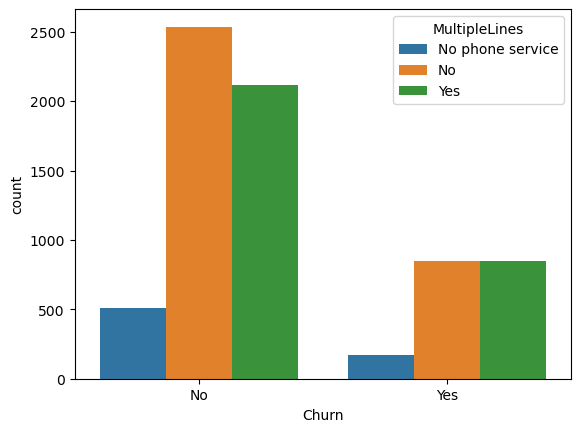

In [359]:
  sns.countplot(x='Churn', hue ='MultipleLines', data=df);

Those who have opted for fiber optics are more likely to churn and on the contrary ,those who have dsl service have more retension


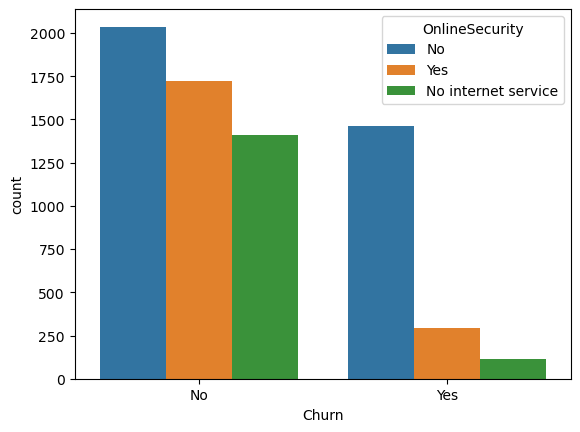

In [360]:
sns.countplot(x='Churn', hue ='OnlineSecurity', data=df);

people who doesnt have online security are more likely to churn

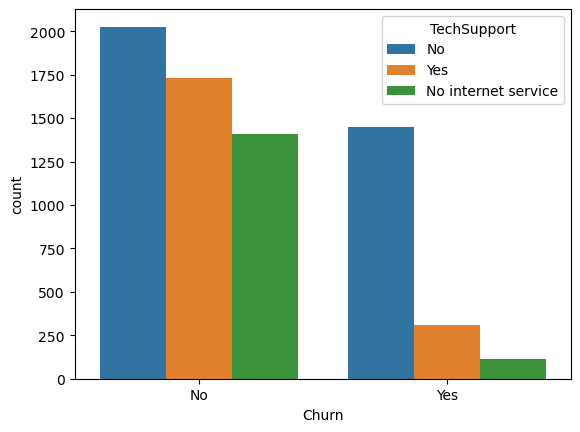

In [361]:
sns.countplot(x='Churn', hue ='TechSupport', data=df);

people who doesnt have tech support are more likely to churn

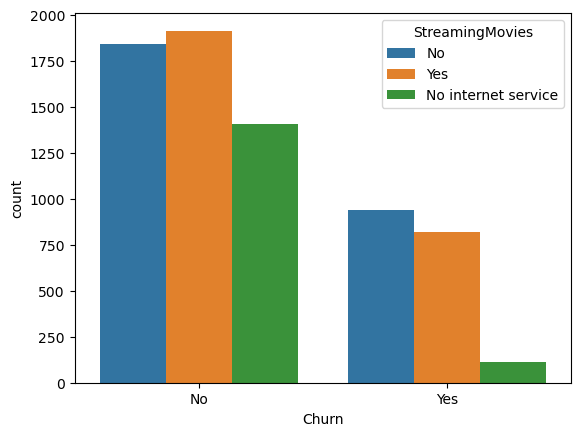

In [362]:
sns.countplot(x='Churn', hue ='StreamingMovies', data=df);

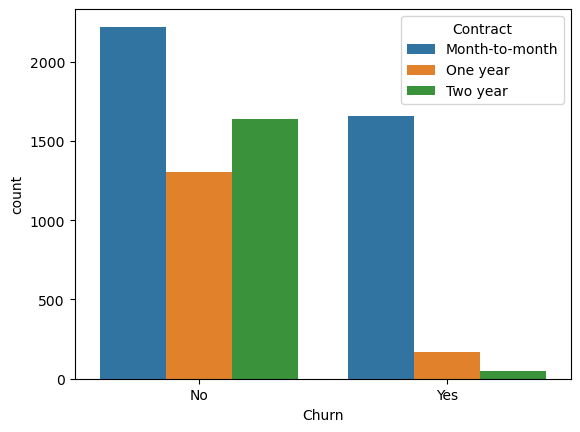

In [363]:
sns.countplot(x='Churn', hue ='Contract', data=df);

People who are on monthly contract are more likely to churn and people who are on yearly contract are less likely to churn

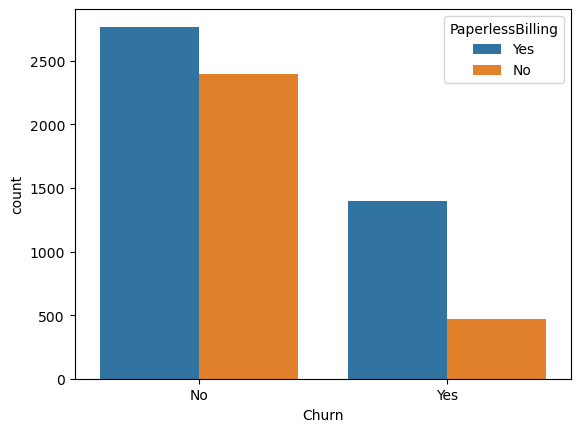

In [364]:
sns.countplot(x='Churn', hue ='PaperlessBilling', data=df);

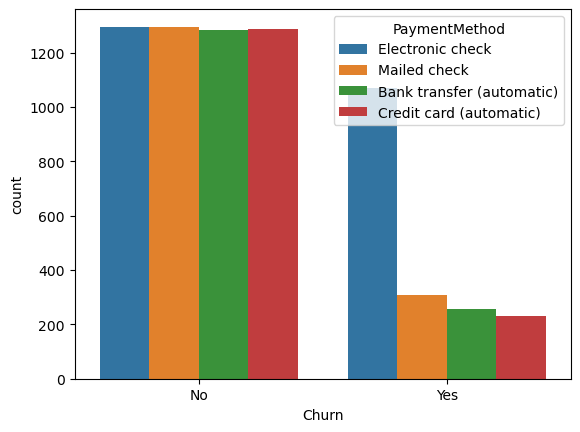

In [365]:
sns.countplot(x='Churn', hue ='PaymentMethod', data=df);

People who have opted for electronic check are more likely to churn

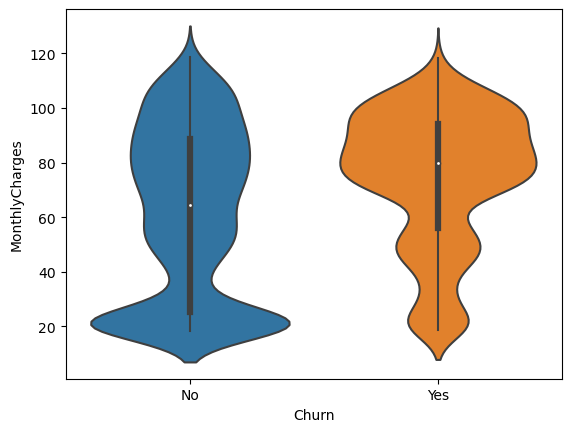

In [366]:
sns.violinplot(x='Churn', y ='MonthlyCharges', data =df);

people who have high monthly charges are more likely to churn 

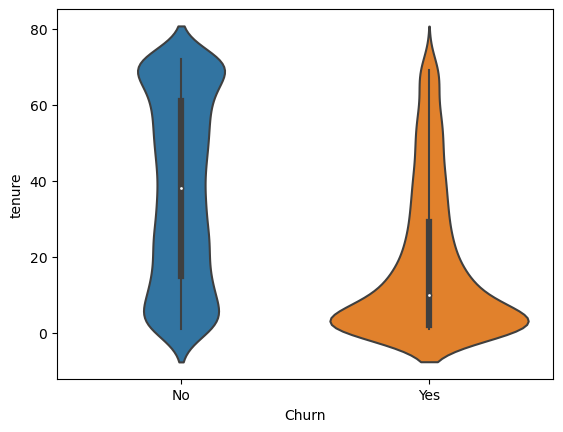

In [367]:
sns.violinplot(x='Churn', y ='tenure', data =df);

people who are on low tenure or who have subscribe for less number of months are more likely to churn

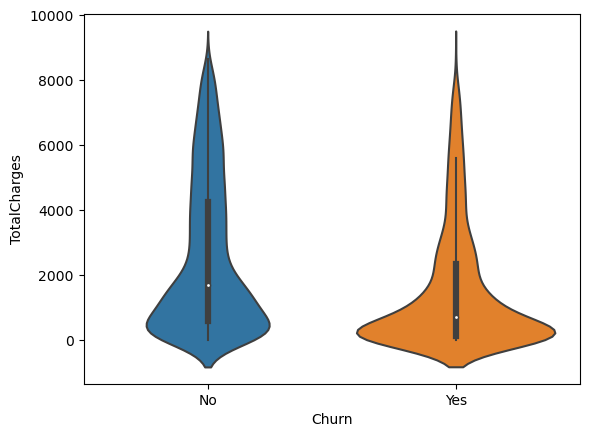

In [368]:
sns.violinplot(x='Churn', y ='TotalCharges', data =df);

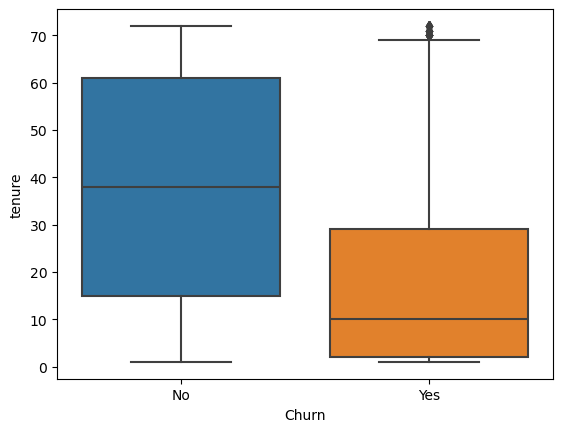

In [369]:
sns.boxplot(x='Churn', y ='tenure', data =df);

<Axes: xlabel='TotalCharges', ylabel='Density'>

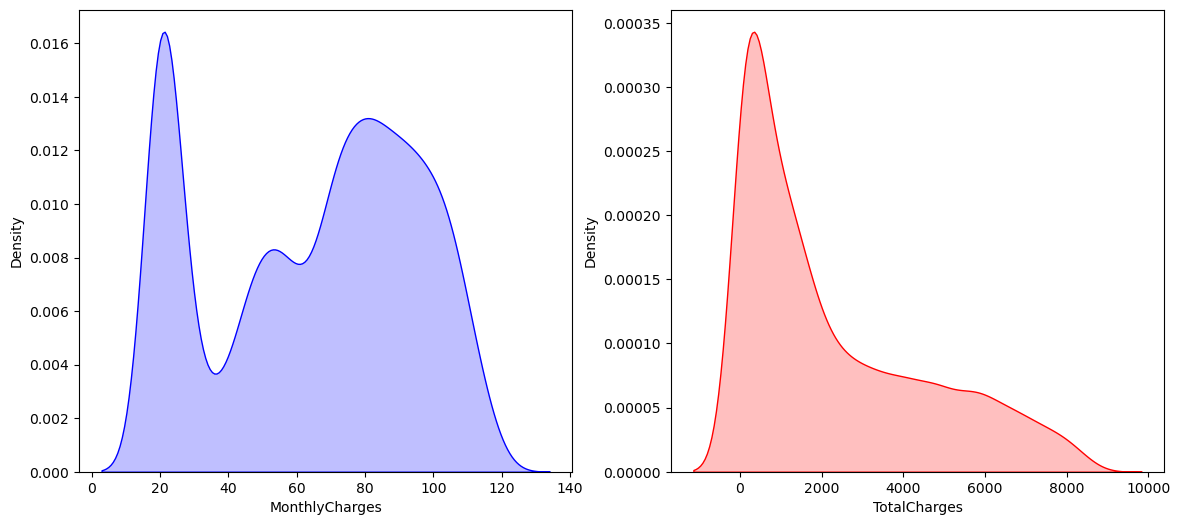

In [370]:
fig,axes =plt.subplots(1,2,figsize=(14,6))
sns.kdeplot(df['MonthlyCharges'],ax=axes[0],color='blue',shade=True)
sns.kdeplot(df['TotalCharges'],ax=axes[1],color='red',shade=True)

# Correlation Matrix

<Axes: >

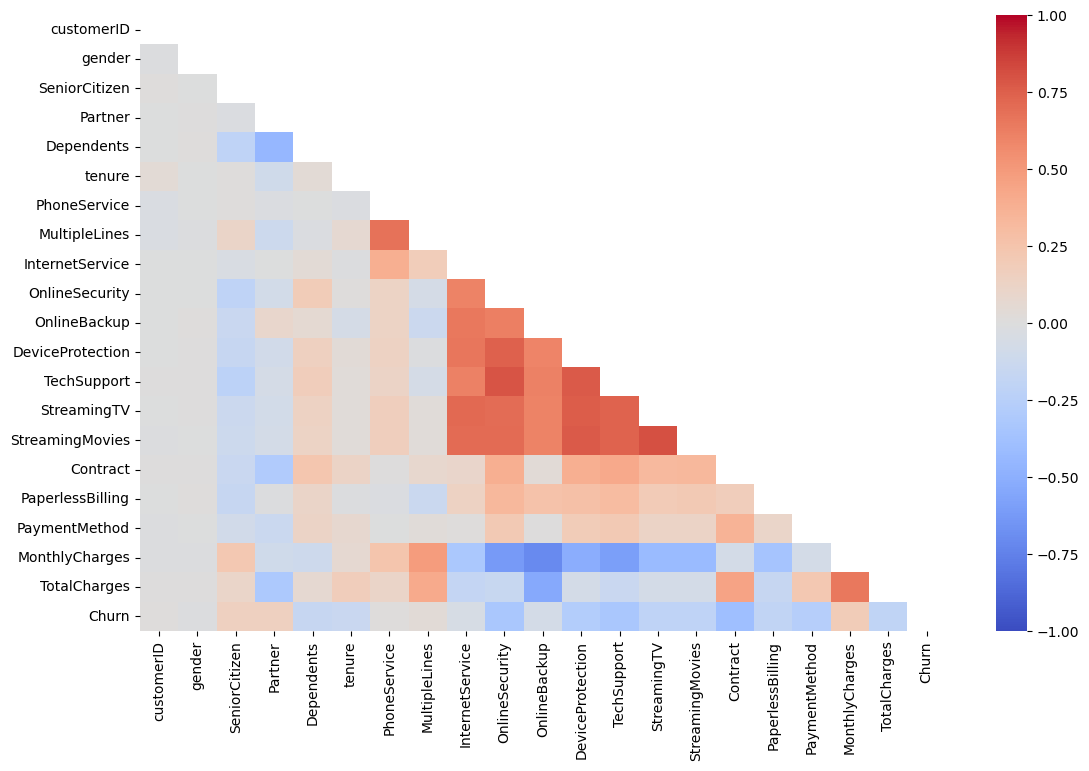

In [371]:

plt.figure(figsize=(13,8))
corr= df.apply(lambda x: pd.factorize(x)[0] if x.dtype!='float64' else x).corr()
mask= np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm',vmax=1, vmin=-1 ,center=0, annot=True ,fmt='.2f')


# Label Encoder

In [372]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [373]:
cat_cols= [col for col in df.columns if df[col].dtype=='object']
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [374]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [375]:
# perform log transformation
df['MonthlyCharges'] = np.log(df['MonthlyCharges']+1)
df['TotalCharges'] = np.log(df['TotalCharges']+1)

<Axes: xlabel='TotalCharges', ylabel='Density'>

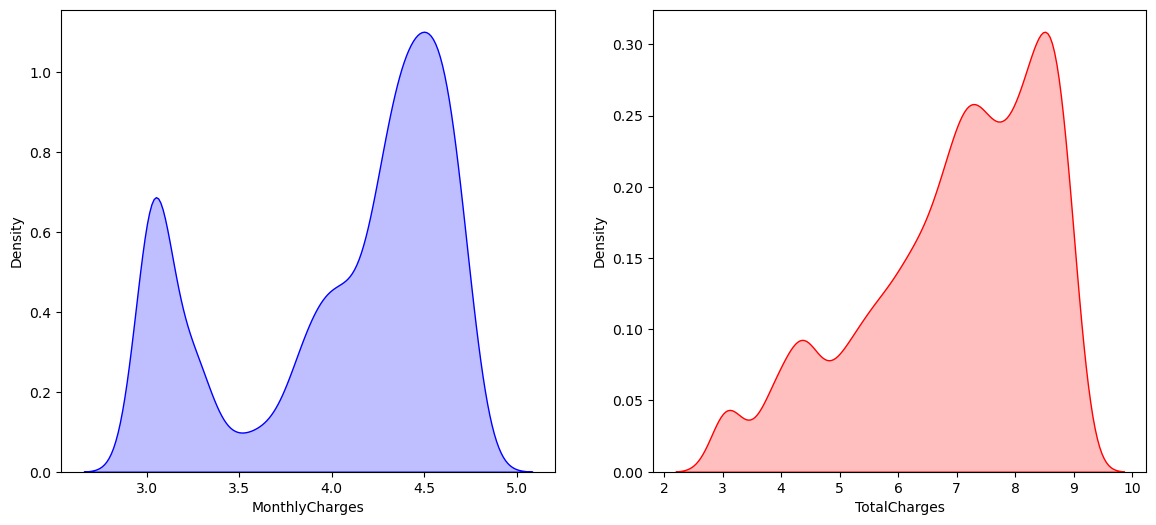

In [376]:
fig,axes =plt.subplots(1,2,figsize=(14,6))
sns.kdeplot(df['MonthlyCharges'],ax=axes[0],color='blue',shade=True)
sns.kdeplot(df['TotalCharges'],ax=axes[1],color='red',shade=True)

# Train Test Split

In [377]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [378]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X , y, test_size =0.2 , random_state=42, stratify=y)

# Model Training

In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialise and train model
model = LogisticRegression()
model.fit(X_train,y_train)

# get predictions
y_pred = model.predict(X_test)

print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407



In [380]:
from sklearn.ensemble import RandomForestClassifier

# initialise and train model
model = LogisticRegression()
model.fit(X_train,y_train)

# get predictions
y_pred = model.predict(X_test)

print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407



# Confusion Matrix


<Axes: >

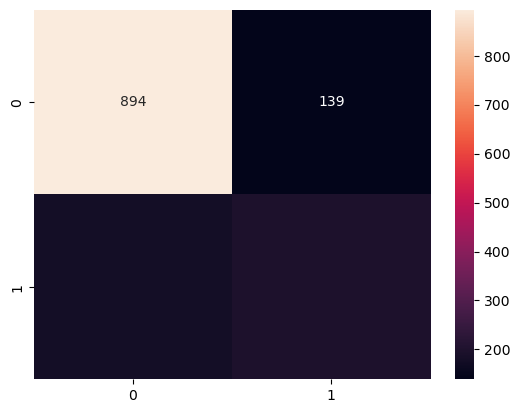

In [381]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True , fmt='d')

In [382]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [383]:
print(df['tenure'].dtype)


int64


In [384]:
print(df['SeniorCitizen'].dtype)


int32


In [385]:
df.to_csv("Cleaned_Churn_Data.csv", index=False)


PermissionError: [Errno 13] Permission denied: 'Cleaned_Churn_Data.csv'